<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/Module_1_Errors/Project1Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 With `sympy`
## Dr. Nicholas C Jacob

I wanted to re-attempt the project with a new software tool I have been using for my calculus classes.  It is using a computer algebra system so some things are easier and others harder.  Actually the very first question is harder...

In [2]:
from sympy import *
x,y,n = symbols(('x','y','n'))


# Part 1:  Finding Errors

Absolute and relative errors are basic functions.  I am not a fon of how I did these though!

In [3]:
trueerror = x-y
relativeerror = (x-y)/y

In [8]:
trueerror.subs([(x,5),(y,6)])

-1

The `subs` command is not my favorite.  There are ways around it, but I'll leave it be for the time being.

In [9]:
approxerror = x -y
approxrelativeerror = (x-y)/x

## Part 2:  Taylor's Series

This is why I accutually wanted to do `sympy`.  I am going to look at a Bessel function, I choose order 0.

In [21]:
f = besselj(0,x)
f

besselj(0, x)

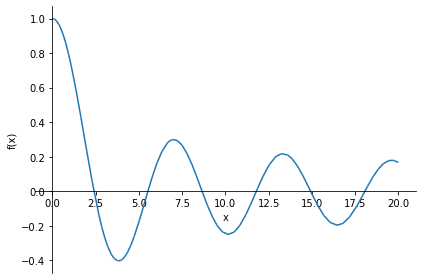

In [23]:
plot(f,(x,0,20))

Looks like a fun function to approximate!  I use the built ins to just compute the series

In [28]:
g = series(f,x,x0 = 1, n = 20).removeO()
g

(x - 1)**19*(-besselj(3, 1)/421906448646144000 - besselj(7, 1)/1175310821228544000 - besselj(11, 1)/8227175748599808000 - besselj(15, 1)/186482650301595648000 - besselj(19, 1)/31888533201572855808000 + besselj(17, 1)/1678343852714360832000 + besselj(13, 1)/32908702994399232000 + besselj(9, 1)/2742391916199936000 + besselj(5, 1)/632859672969216000 + besselj(1, 1)/345196185255936000) + (x - 1)**18*(-besselj(0, 1)/34519618525593600 - besselj(4, 1)/26369153040384000 - besselj(8, 1)/97942568435712000 - besselj(12, 1)/1028396968574976000 - besselj(16, 1)/46620662575398912000 + besselj(18, 1)/839171926357180416000 + besselj(14, 1)/5484783832399872000 + besselj(10, 1)/274239191619993600 + besselj(6, 1)/45204262354944000 + besselj(2, 1)/19177565847552000) + (x - 1)**17*(-besselj(1, 1)/958878292377600 - besselj(5, 1)/1883510931456000 - besselj(9, 1)/9794256843571200 - besselj(13, 1)/171399494762496000 - besselj(17, 1)/23310331287699456000 + besselj(15, 1)/1371195958099968000 + besselj(11, 1)/342

That looks really complicated, but it did it all for me very quickly!  I plot these two functions together and notice that at $x=1$ they will exactly meet and start to diverge away from there.

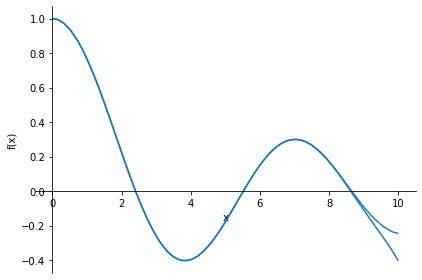

In [30]:
plot(f,g,(x,0,10))

I trimmed the window because by 20 they were so far apart as to not see their nearness in the window $(0,10)$.

In [34]:
print("Step","Approximation","Actual")
for i in range(1,20):
  print(i,N(series(f,x,x0 = 1, n = i).removeO().subs(x,1.1)),N(f.subs(x,1.1)))

Step Approximation Actual
1 0.765197686557967 0.719622018527511
2 0.721192627983473 0.719622018527511
3 0.719566892479408 0.719622018527511
4 0.719621083662877 0.719622018527511
5 0.719622041191918 0.719622018527511
6 0.719622018780778 0.719622018527511
7 0.719622018522824 0.719622018527511
8 0.719622018527472 0.719622018527511
9 0.719622018527512 0.719622018527511
10 0.719622018527511 0.719622018527511
11 0.719622018527511 0.719622018527511
12 0.719622018527511 0.719622018527511
13 0.719622018527511 0.719622018527511
14 0.719622018527511 0.719622018527511
15 0.719622018527511 0.719622018527511
16 0.719622018527511 0.719622018527511
17 0.719622018527511 0.719622018527511
18 0.719622018527511 0.719622018527511
19 0.719622018527511 0.719622018527511


We can see that by $n = 10$ the series is spot on up to the floating point.  For giggles, I'll do the approximate error from $n=2$ to $n=3$

In [36]:
approxerror.subs([(x,N(series(f,x,x0 = 1, n = 3).removeO().subs(x,1.1))),(y,N(series(f,x,x0 = 1, n = 2).removeO().subs(x,1.1)))])

-0.00162573550406520

not bad!

In [38]:
approxrelativeerror.subs([(x,N(series(f,x,x0 = 1, n = 3).removeO().subs(x,1.1))),(y,N(series(f,x,x0 = 1, n = 2).removeO().subs(x,1.1)))])

-0.00225932504824300

Less that 0.2%

##Part 3:  Meme Exploration
![meme](https://raw.githubusercontent.com/nurfnick/Numerical_Methods/master/Module_1_Errors/approximation.jpg)

I am going to play around with the second approximation.

In [39]:
h = sqrt(x**2+y**2)
i = 0.96*x+0.4*y

In [40]:
l = [(x,y) for x in range(0,10) for y in range(0,10)]

In [47]:
for val in l:
  print(val,i.subs([(x,val[0]),(y,val[1])]),N(h.subs([(x,val[0]),(y,val[1])])),relativeerror.subs([(x,i.subs([(x,val[0]),(y,val[1])])),(y,N(h.subs([(x,val[0]),(y,val[1])])))]))

(0, 0) 0 0 -1
(0, 1) 0.400000000000000 1.00000000000000 -0.600000000000000
(0, 2) 0.800000000000000 2.00000000000000 -0.600000000000000
(0, 3) 1.20000000000000 3.00000000000000 -0.600000000000000
(0, 4) 1.60000000000000 4.00000000000000 -0.600000000000000
(0, 5) 2.00000000000000 5.00000000000000 -0.600000000000000
(0, 6) 2.40000000000000 6.00000000000000 -0.600000000000000
(0, 7) 2.80000000000000 7.00000000000000 -0.600000000000000
(0, 8) 3.20000000000000 8.00000000000000 -0.600000000000000
(0, 9) 3.60000000000000 9.00000000000000 -0.600000000000000
(1, 0) 0.960000000000000 1.00000000000000 -0.0400000000000000
(1, 1) 1.36000000000000 1.41421356237310 -0.0383347775862955
(1, 2) 1.76000000000000 2.23606797749979 -0.212904071920074
(1, 3) 2.16000000000000 3.16227766016838 -0.316948025403630
(1, 4) 2.56000000000000 4.12310562561766 -0.379108799906988
(1, 5) 2.96000000000000 5.09901951359278 -0.419496239990975
(1, 6) 3.36000000000000 6.08276253029822 -0.447619402653999
(1, 7) 3.760000000000

I think what I am most amazed by is these relative errors stay below 10% and are much easier to compute!  I hypothesysed that the x value should be the larger value but it doesn't seem to matter too much!